# Main

In [1]:
import mydatasets
import mymodels
import utils
import numpy as np
import torch
import copy
import sys
import os
import json 
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from torchinfo import summary
import pickle

In [2]:
ttt = torch.rand(10,8,3)
mmm = torch.nn.Conv1d(3,1,2)

In [3]:
mmm(ttt.permute(0,2,1)).shape

torch.Size([10, 1, 7])

In [4]:
ttt2 = torch.rand(500,200, 20)
mmm2 = torch.nn.Conv1d(20, 8, kernel_size=3, padding='same')

In [5]:
mmm2(ttt2.permute(0,2,1)).permute(0,2,1).shape

torch.Size([500, 200, 8])

In [6]:
ttt.permute(0,2,1).shape

torch.Size([10, 3, 8])

In [7]:
X = pd.read_csv('../data/gene_data.csv', header=None, index_col=0)
X

,1,2,3,4,5,6,7,8,9,10,...,3958,3959,3960,3961,3962,3963,3964,3965,3966,3967
0,,,,,,,,,,,,,,,,,,,,,
SRR1166318,0,0,1,0,0,4,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
ERR176810,0,0,1,0,2,3,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
ERR181956,0,0,1,0,1,3,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
SRR2100379,0,0,1,0,0,4,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
SRR924706,0,0,1,0,2,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR671746,0,0,1,0,0,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
SRR1146372,0,0,2,0,0,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
ERR176477,0,0,1,0,1,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Y = pd.read_csv('../data/AllLabels.csv', index_col='id')
Y = Y[Y.index.isin(X.index)]
Y

,amikacin,capreomycin,ciprofloxacin,ethambutol,ethionamide,isoniazid,kanamycin,moxifloxacin,ofloxacin,pyrazinamide,rifampicin,streptomycin
id,,,,,,,,,,,,
SRR3675211,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN
SRR3675215,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN
SRR3675217,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,0.0,1.0,NaN
SRR3675218,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,0.0,NaN
SRR3675224,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
SRR924705,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
SRR924706,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
SRR924707,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0


In [9]:
NoYs = X[np.logical_not(X.index.isin(Y.index))]
print('Xs with no Y found:', NoYs.shape[0])
X = X.drop(NoYs.index)

Xs with no Y found: 115


In [10]:
X = X.sort_index().reset_index().rename(columns={0: 'id'})
Y = Y.sort_index().reset_index()

In [11]:
X_mat = X.iloc[:, 1:].to_numpy()
Y_mat = Y.iloc[:, 1:].to_numpy()

In [12]:
#Test
np.nansum(Y_mat[150] * Y_mat[500])

1.0

In [13]:
#Test
nonz = 0
for i in range(Y_mat.shape[0]):
    nonz += np.sum(np.nansum(Y_mat * Y_mat[i], axis=1) != 0)
(nonz/2) / (7845*7845)

0.1073278762641865

In [14]:
#Test
nonz2 = 0
for i in range(Y_mat.shape[0]):
    nonz2 += np.sum(Y_mat == Y_mat[i])
(nonz2 /2) / (7845*7845)

1.0149688860941415

In [15]:
#Test
(Y_mat[0] - Y_mat[1])**2

array([nan, nan, nan,  0., nan,  0., nan, nan, nan, nan,  0.,  0.])

In [16]:
#Test
a = np.array([
    [1, 9, 7, 1, 1],
    [6, np.nan, 3, 9, 0],
    [1, 8, 6, np.nan, 1],
    [7, 4, 0, 5, 3]])
np.nanmean(a, axis=0)

array([3.75, 7.  , 4.  , 5.  , 1.25])

In [17]:
a.tolist()

[[1.0, 9.0, 7.0, 1.0, 1.0],
 [6.0, nan, 3.0, 9.0, 0.0],
 [1.0, 8.0, 6.0, nan, 1.0],
 [7.0, 4.0, 0.0, 5.0, 3.0]]

In [18]:
np.nonzero(a.flatten())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 18,
        19]),)

In [19]:
for i in range(5):
    print(i)

0
1
2
3
4


In [20]:
np.sort(1-a)

array([[-8., -6.,  0.,  0.,  0.],
       [-8., -5., -2.,  1., nan],
       [-7., -5.,  0.,  0., nan],
       [-6., -4., -3., -2.,  1.]])

In [21]:
#Test - Data for each column
np.sum(np.logical_not(np.isnan(Y_mat)), axis=0)

array([2033, 1991,  443, 6096, 1516, 7734, 2436,  961, 2911, 3858, 7715,
       5125])

In [22]:
#Test - Rows with all zeros
np.sum(np.all(np.logical_or(Y_mat == 0, np.isnan(Y_mat)), axis=1))

4056

In [23]:
val_test_count = int(X_mat.shape[0] * 0.1)
val_test_indcs = (np.random.permutation(X_mat.shape[0])[:2*val_test_count]).reshape((2, -1))

X_val = X_mat[val_test_indcs[0], :]
Y_val = Y_mat[val_test_indcs[0], :]

X_test = X_mat[val_test_indcs[1], :]
Y_test = Y_mat[val_test_indcs[1], :]

X_train = np.delete(X_mat, val_test_indcs.flatten(), axis=0)
Y_train = np.delete(Y_mat, val_test_indcs.flatten(), axis=0)
print(f'Train Count: {X_train.shape[0]}')
print(f'Validation Count: {X_val.shape[0]}')
print(f'Test Count: {X_test.shape[0]}')

shuffle_indcs = np.random.permutation(X_train.shape[0])
X_train = X_train[shuffle_indcs, :]
Y_train = Y_train[shuffle_indcs, :]

Train Count: 6277
Validation Count: 784
Test Count: 784


In [24]:
def get_roc(x_train: np.ndarray, y_train: np.ndarray, x_eval: np.ndarray, y_eval: np.ndarray, model, n_neighbors=5):
    emb_train = model(torch.from_numpy(x_train.astype('float32'))).detach().numpy()
    emb_val = model(torch.from_numpy(x_eval.astype('float32'))).detach().numpy()
    KNN = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto').fit(emb_train)

    nbr_dists, nbr_indcs = KNN.kneighbors(emb_val)
    y_k_neghbors = y_train[nbr_indcs, :]
    y_pred = np.nanmean(y_k_neghbors, axis=1)
    y_pred[np.where(np.isnan(y_pred))] = 0.5
    #y_pred = np.round(y_pred)

    condition = np.where(np.logical_and(np.logical_not(np.isnan(y_eval)), np.logical_not(np.isnan(y_pred))))

    #### CALCULATE ROC

    #return np.sum(y_pred[condition] == y_eval[condition]) / y_eval[condition].shape[0]

In [25]:
def get_acc(x_train: np.ndarray, y_train: np.ndarray, x_eval: np.ndarray, y_eval: np.ndarray, model, n_neighbors=5):
    emb_train= model(torch.from_numpy(x_train.astype('float32')))[0].detach().numpy()
    emb_val= model(torch.from_numpy(x_eval.astype('float32')))[0].detach().numpy()
    KNN = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto').fit(emb_train)

    nbr_dists, nbr_indcs = KNN.kneighbors(emb_val)
    y_k_neghbors = y_train[nbr_indcs, :] #y_eval x 5 x 12
    y_pred = np.nanmean(y_k_neghbors, axis=1) #y_eval x 12
    y_pred = np.round(y_pred) #0.5 > --> 1

    condition = np.where(np.logical_and(np.logical_not(np.isnan(y_eval)), np.logical_not(np.isnan(y_pred))))

    return np.sum(y_pred[condition] == y_eval[condition]) / y_eval[condition].shape[0]

In [26]:
def get_acc_weighted(x_train: np.ndarray, y_train: np.ndarray, x_eval: np.ndarray, y_eval: np.ndarray, model, n_neighbors=5):
    emb_train= model(torch.from_numpy(x_train.astype('float32')))[0].detach().numpy()
    emb_val= model(torch.from_numpy(x_eval.astype('float32')))[0].detach().numpy()
    KNN = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto').fit(emb_train)

    nbr_dists, nbr_indcs = KNN.kneighbors(emb_val)
    nbr_weights = np.exp(-nbr_dists)
    y_k_neghbors = y_train[nbr_indcs, :] #y_eval x 5 x 12
    y_k_neighbors_weighted = y_k_neghbors * nbr_weights.reshape(-1, n_neighbors, 1)
    #y_pred = np.nanmean(y_k_neighbors_weighted, axis=1) #y_eval x 12
    y_pred = np.nansum(y_k_neighbors_weighted, axis=1) / np.sum(nbr_weights.reshape(-1, n_neighbors, 1), axis=1)
    y_pred = np.round(y_pred) #0.5 > --> 1

    condition = np.where(np.logical_and(np.logical_not(np.isnan(y_eval)), np.logical_not(np.isnan(y_pred))))

    return np.sum(y_pred[condition] == y_eval[condition]) / y_eval[condition].shape[0]

In [27]:
def get_acc_per_drug(x_train: np.ndarray, y_train: np.ndarray, x_eval: np.ndarray, y_eval: np.ndarray, model, n_neighbors=5):
  emb_train= model(torch.from_numpy(x_train.astype('float32')))[0].detach().numpy()
  emb_val= model(torch.from_numpy(x_eval.astype('float32')))[0].detach().numpy()
  KNN = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(emb_train)

  nbr_dists, nbr_indcs = KNN.kneighbors(emb_val)
  y_k_neghbors = Y_train[nbr_indcs, :] #y_eval x 5 x 12
  y_pred = np.nanmean(y_k_neghbors, axis=1) #y_eval x 12
  y_pred = np.round(y_pred) #0.5 > --> 1

  acc_per_drug = np.zeros(y_eval.shape[1])
  for i in range(y_eval.shape[1]):
    condition = np.where(np.logical_and(np.logical_not(np.isnan(y_eval[:, i])), np.logical_not(np.isnan(y_pred[:, i]))))
    acc_per_drug[i] = np.sum(y_pred[condition, i] == y_eval[condition, i]) / y_eval[condition, i].shape[1]
  return acc_per_drug

In [28]:
def get_acc_per_drug_weighted(x_train: np.ndarray, y_train: np.ndarray, x_eval: np.ndarray, y_eval: np.ndarray, model, n_neighbors=5):
    emb_train = model(torch.from_numpy(x_train.astype('float32')))[0].detach().numpy()
    emb_val = model(torch.from_numpy(x_eval.astype('float32')))[0].detach().numpy()
    KNN = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto').fit(emb_train)

    nbr_dists, nbr_indcs = KNN.kneighbors(emb_val)
    nbr_weights = np.exp(-nbr_dists)
    y_k_neghbors = y_train[nbr_indcs, :] #y_eval x 5 x 12
    y_k_neighbors_weighted = y_k_neghbors * nbr_weights.reshape(-1, n_neighbors, 1)
    #y_pred = np.nanmean(y_k_neighbors_weighted, axis=1) #y_eval x 12
    y_pred = np.nansum(y_k_neighbors_weighted, axis=1) / np.sum(nbr_weights.reshape(-1, n_neighbors, 1), axis=1)
    y_pred = np.round(y_pred) #0.5 > --> 1

    acc_per_drug = np.zeros(y_eval.shape[1])
    for i in range(y_eval.shape[1]):
        condition = np.where(np.logical_and(np.logical_not(np.isnan(y_eval[:, i])), np.logical_not(np.isnan(y_pred[:, i]))))
        acc_per_drug[i] = np.sum(y_pred[condition, i] == y_eval[condition, i]) / y_eval[condition, i].shape[1]
    return acc_per_drug

In [29]:
def get_classifier_acc(model, x_eval, y_true):
    y_pred = model(torch.from_numpy(x_eval.astype('float32')))[1].detach().numpy()   
    condition = np.where(np.logical_not(np.isnan(y_true)))
    y_pred = np.round(y_pred)
    return np.sum(y_pred[condition] == y_true[condition]) / y_pred[condition].shape[0]

In [33]:
def get_triplets(embeddings_tensor, y_batch, max_negatives_per_positive, max_trips_per_anchor, factors):
    triplets = []
    embeddings = embeddings_tensor.detach().numpy()
    num_fine_trips = 0
    num_coarse_trips = 0
    for i in range(embeddings.shape[0]):
        num_anchor_trips = 0
        anchor_emb = embeddings[i, :]
        anchor_y = y_batch[i, :]

        #get similarities
        #sim_scores = np.nansum(y_batch * (anchor_y * factors), axis=1) #dot product similarity
        sim_scores = utils.my_sim(y_batch, anchor_y, factors) #Equality Similarity

        #get embedding distances
        distances_emb = np.sqrt(np.sum((embeddings - anchor_emb)**2, axis=1))

        #sort similarities w.r.t. distances
        sorted_distances_indcs = np.argsort(distances_emb)
        similarities_sorted_by_distance = sim_scores[sorted_distances_indcs[:50]]

        for pos_sim_limit in reversed(range(y_batch.shape[1])):
            if pos_sim_limit == 0: continue
            positive_indcs = np.nonzero(similarities_sorted_by_distance == pos_sim_limit)[0]
            
            for positive_idx in np.flip(positive_indcs):
                num_negatives = 0
                #Excluding the Anchor
                if sorted_distances_indcs[positive_idx] == i:
                    continue

                positive_similarity = similarities_sorted_by_distance[positive_idx]
                
                #Points with a lower similarity and also a lower distance
                positive_misorderings_condition = np.logical_and(similarities_sorted_by_distance[:positive_idx] < positive_similarity, similarities_sorted_by_distance[:positive_idx] > 0)

                for negative_idx in np.nonzero(positive_misorderings_condition)[0]:
                    triplets.append((i, sorted_distances_indcs[positive_idx], sorted_distances_indcs[negative_idx]))
                    num_anchor_trips += 1
                    num_negatives += 1
                    num_fine_trips +=1
                    if num_negatives > max_negatives_per_positive: break
                
                if num_anchor_trips >= max_trips_per_anchor: break
                zero_condition = np.nonzero(similarities_sorted_by_distance[:positive_idx] == 0)[0]
                if len(zero_condition) == 0: continue
                num_negatives = np.minimum(zero_condition.shape[0], max_negatives_per_positive)
                for _ in range(num_negatives):
                    idx = np.random.randint(len(zero_condition))
                    zero_idx = zero_condition[idx]
                    triplets.append((i, sorted_distances_indcs[positive_idx], sorted_distances_indcs[zero_idx]))
                    num_anchor_trips += 1
                    num_coarse_trips += 1


                if num_anchor_trips >= max_trips_per_anchor: break
            if num_anchor_trips >= max_trips_per_anchor: break
        
    if len(triplets) == 0: return None

    anchors = []
    positives = []
    negatives = []
    for (a,p,n) in triplets:
        anchors.append(embeddings_tensor[a, :].reshape(1, -1))
        positives.append(embeddings_tensor[p, :].reshape(1, -1))
        negatives.append(embeddings_tensor[n, :].reshape(1, -1))
    
    anchors = torch.cat(anchors, dim=0)
    positives = torch.cat(positives, dim=0)
    negatives = torch.cat(negatives, dim=0)
    return anchors, positives, negatives, num_fine_trips, num_coarse_trips, pos_sim_limit
                
            
                
        

In [31]:
model=mymodels.SimpleNet_with_Classifier(X_train.shape[1], 30, [X_train.shape[1], 1500, 30], [50, 20, Y_train.shape[1]])
loss_list = []
acc_train_list = []
acc_eval_list = []
factors=np.zeros(Y_train.shape[1])+1.0
log_every=1

In [32]:
np.sum(Y_mat == 0)/np.sum(np.logical_not(np.isnan(Y_mat)))

0.6738830892827951

In [31]:
#Change the Folder Name
#ONLY Run if you want to load a model
model = torch.load('../FC_weightedKNN_newtrips/model.pth')
with open('../FC_weightedKNN_newtrips/lists.list', 'rb') as f:
  loss_list, acc_train_list, acc_eval_list = pickle.load(f)

In [34]:
summary(model, input_size=(500,3967), device='cpu', verbose=0, col_names=['kernel_size', 'output_size', 'num_params'])

Layer (type:depth-idx)                   Kernel Shape              Output Shape              Param #
SimpleNet_with_Classifier                --                        --                        --
├─ModuleList: 1-1                        --                        --                        --
├─ModuleList: 1-2                        --                        --                        --
├─ModuleList: 1-1                        --                        --                        --
│    └─Linear: 2-1                       [3967, 1500]              [500, 1500]               5,952,000
│    └─Linear: 2-2                       [1500, 30]                [500, 30]                 45,030
├─ModuleList: 1-2                        --                        --                        --
│    └─Linear: 2-3                       [30, 50]                  [500, 50]                 1,550
│    └─Linear: 2-4                       [50, 20]                  [500, 20]                 1,020
│    └─Linear: 2-5

In [37]:
torch.sigmoid(model(torch.from_numpy(x_batch.astype('float32')))).shape

torch.Size([500, 30])

In [40]:
(1 - torch.mean(torch.var(embeddings, dim=1)))**2

tensor(0.9602, grad_fn=<PowBackward0>)

In [41]:
loss_batch + (1 - torch.mean(torch.var(embeddings, dim=1)))**2

tensor(1.9604, grad_fn=<AddBackward0>)

In [35]:
def masked_loss_function(y_pred, y_true):   
    condition = np.where(np.logical_not(np.isnan(y_true)))

    loss = torch.nn.BCELoss()

    y_true = torch.tensor(y_true[condition]).float()
    return loss(y_pred[condition] ,y_true)

In [36]:
for epoch in range(200):
	# get scheduled values of hyper params
	tmargin=1
	batch_size=500
	lrate=0.001
	max_trips=100
	max_neg=3
	print("Epoch ",epoch,(tmargin,batch_size,lrate,max_trips,max_neg))
	# define loss and create optimizer
	triplet_loss = torch.nn.TripletMarginLoss(margin=tmargin, p=2)
	triplet_loss2 = torch.nn.TripletMarginLoss(margin=tmargin, p=2, reduction='none')
	classifier_loss = masked_loss_function
	optimizer = torch.optim.Adam(model.parameters(),lr=lrate)
	# get batches
	mini_batches=utils.make_batches(X_train, Y_train, batch_size)
	loss_values=[]
	for batch_num,batch in enumerate(mini_batches):
		x_batch,y_batch=batch
		# generate embeddings
		embeddings, classes=model(torch.from_numpy(x_batch.astype('float32')))
		# generate triplets (online)
		trips=get_triplets(embeddings,y_batch,max_neg,max_trips,factors)
		# trips=utils.get_triplets(embeddings,y_batch,max_neg,max_trips,factors,debug=False)
		if trips is None:
			continue
		# anch, pos, neg=trips
		anch, pos, neg, num_fine_trips, num_coarse_trips, last_pos_sim_limit=trips
		# compute loss
		loss_triplet=triplet_loss(anch,pos,neg)
		# loss_var = (1 - torch.mean(torch.var(embeddings, dim=1)))**2
		loss_classifier = classifier_loss(classes, y_batch.astype('float32'))
		loss_batch = loss_triplet + loss_classifier
		loss_batch2=triplet_loss2(anch,pos,neg)
		loss_values.append(loss_batch.detach().numpy())
		# backprop
		optimizer.zero_grad()
		loss_batch.backward(retain_graph=True)
		optimizer.step()
		print("Batch size :",anch.shape[0]," - Fine Trips: ",num_fine_trips, " - Coarse Trips:", num_coarse_trips," - Last pos limit: ",last_pos_sim_limit,",- Loss value :",loss_batch.detach().numpy())
		print("Below Margin? ", torch.sum(loss_batch2 < tmargin).item(), " - Triplet Loss: ", loss_triplet.item(), " - Class Loss: ", loss_classifier.item())
		# print("Batch size :",anch.shape[0],",- Loss value :",loss_batch.detach().numpy())
	loss_mean=np.mean(np.array(loss_values))
	train_acc = get_acc_weighted(X_train, Y_train, X_train, Y_train, model, n_neighbors=5)
	val_acc = get_acc_weighted(X_train, Y_train, X_val, Y_val, model, n_neighbors=5)
	train_acc_classifier = get_classifier_acc(model, X_train, Y_train)
	val_acc_classifier = get_classifier_acc(model, X_val, Y_val)
	loss_list.append(loss_mean)
	acc_train_list.append(train_acc)
	acc_eval_list.append(val_acc)
	print("\tTrain Loss for this epoch :",loss_mean)
	print("\tTrain Accuracy for this epoch:", train_acc)
	print("\tValidation Accuracy for this epoch:", val_acc)
	print("\tTrain Classifier Accuracy for this epoch:", train_acc_classifier)
	print("\tValidation Classifier Accuracy for this epoch:", val_acc_classifier)

	if (epoch+1)%5 == 0:
		#Change Folder Name
		torch.save(model, '../test/model.pth')
		with open('../test/lists.list', 'wb') as f:
			pickle.dump((loss_list, acc_train_list, acc_eval_list), f)
		print('model saved!')

	# if (epoch+1)%log_every==0:
	# 	utils.log_epoch_metrics('t.txt',epoch,loss_mean,model,X_train,Y_train,X_val,Y_val,5)
	print('='*60)
	# # evaluate model
	# if (epoch+1)%checkpoint_every==0:
	# 	torch.save(model,args["run_dir"]+"/model_"+str(epoch+1))

Epoch  0 (1, 500, 0.001, 100, 3)
Batch size : 49748  - Fine Trips:  32285  - Coarse Trips: 17463  - Last pos limit:  3 ,- Loss value : 1.8481922
Below Margin?  0  - Triplet Loss:  1.1061570644378662  - Class Loss:  0.7420352101325989
Batch size : 49789  - Fine Trips:  32977  - Coarse Trips: 16812  - Last pos limit:  1 ,- Loss value : 1.7757995
Below Margin?  0  - Triplet Loss:  1.0357869863510132  - Class Loss:  0.7400125861167908
Batch size : 49171  - Fine Trips:  32991  - Coarse Trips: 16180  - Last pos limit:  5 ,- Loss value : 1.7644204
Below Margin?  0  - Triplet Loss:  1.0245856046676636  - Class Loss:  0.7398347854614258
Batch size : 49082  - Fine Trips:  31557  - Coarse Trips: 17525  - Last pos limit:  4 ,- Loss value : 1.7350965
Below Margin?  0  - Triplet Loss:  1.021436333656311  - Class Loss:  0.7136601805686951
Batch size : 48813  - Fine Trips:  32384  - Coarse Trips: 16429  - Last pos limit:  4 ,- Loss value : 1.7247703
Below Margin?  1  - Triplet Loss:  1.018598198890686

KeyboardInterrupt: 

In [39]:
get_acc_weighted(X_train, Y_train, X_test, Y_test, model, 15)

0.8395003535234504

# Plots

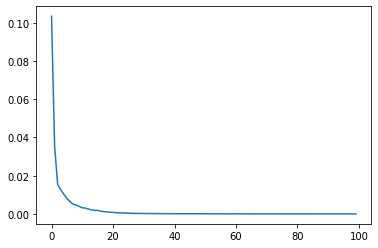

In [40]:
fig, ax = plt.subplots()
x = np.arange(len(loss_list))
y = np.array(loss_list)
ax.plot(x, y)

(0.0, 1.0)

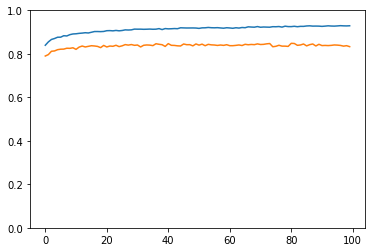

In [41]:
fig, ax = plt.subplots()
ax.plot(x, np.array(acc_train_list))
ax.plot(x, np.array(acc_eval_list))
ax.set_ylim((0,1))

/tmp/ipykernel_31318/2560031081.py:8: RuntimeWarning: Mean of empty slice
  y_pred = np.nanmean(y_k_neghbors, axis=1) #y_eval x 12
/tmp/ipykernel_31318/2560031081.py:8: RuntimeWarning: Mean of empty slice
  y_pred = np.nanmean(y_k_neghbors, axis=1) #y_eval x 12


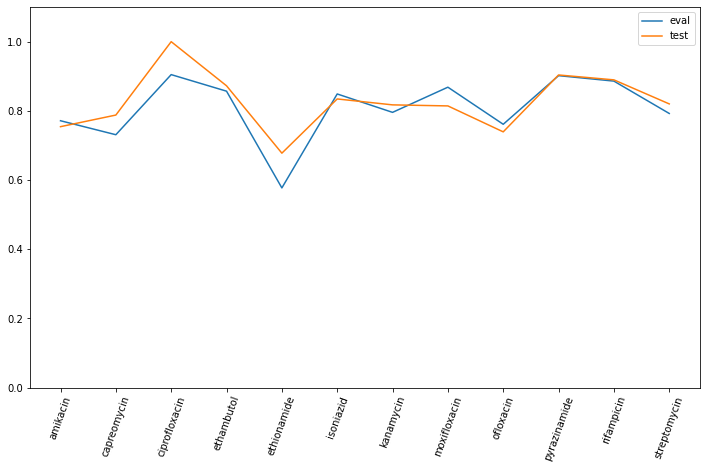

In [42]:
acc_per_drug = get_acc_per_drug(X_train, Y_train, X_val, Y_val, model, 5)
acc_per_drug_test = get_acc_per_drug(X_train, Y_train, X_test, Y_test, model, 5)
drug_names = Y.columns[1:].to_numpy()
fig, ax = plt.subplots()
x = np.arange(drug_names.shape[0])
ax.plot(x, acc_per_drug)
ax.plot(x, acc_per_drug_test)
ax.set_xticks(x)
ax.set_ylim((0,1.1))
ax.set_xticklabels(drug_names, rotation=70)
ax.legend(['eval', 'test'])
fig.set_size_inches((12,7))
fig.set_facecolor('w')

In [39]:
def plot_sim_count(
        X_plt, Y_plt, trained_model, untrained_model, inter_threshold=5, intra_threshold=0, max_points_per_sim=1, weighted_radius=False, custom_anchor_idx=None,
        colors = ['bisque', 'forestgreen', 'slategrey', 'royalblue', 'lawngreen', 'red', 'magenta', 'cyan', 'gold', 'lime', 'peru', 'indigo']
    ):
    if custom_anchor_idx is not None:
        maxi = custom_anchor_idx
        maxlen = np.unique(np.sum(Y_plt == Y_plt[maxi], axis=1)).shape[0]
        print('Custom Anchor:')
        print(f'Max Similarity Count: {maxlen}')
        print(f'Custom Anchor Index: {maxi}')
    else:
        # Find a good anchor
        maxlen = 0
        maxi = 0
        Y_plt_maskable = np.ma.array(Y_plt, mask=False)
        for i in tqdm(range(Y_plt.shape[0])):
            Y_plt_maskable.mask[i] = True
            sim_uniq, sim_counts = np.unique(np.sum(Y_plt_maskable == Y_plt[i], axis=1), return_counts=True)
            sim_uniq = sim_uniq.compressed()
            if maxlen < sim_uniq.shape[0] and np.all(sim_counts[:-1] > 10):
                maxlen = sim_uniq.shape[0]
                maxi = i
            Y_plt_maskable.mask[i] = False
        print(f'Max Similarity Count: {maxlen}')
        print(f'Best Anchor Index: {maxi}')


    #Seperate each similarity count
    sim_list_indcs = []
    for i in range(maxlen):
        sim_list_indcs.append(np.where(np.sum(Y_plt == Y_plt[maxi], axis=1) == i)[0])


    #TSNE
    emb_plt = trained_model(torch.from_numpy(X_plt.astype('float32'))).detach().numpy()
    tsne_plt = TSNE(n_components=2, metric='euclidean').fit_transform(emb_plt)

    # Sort indcs w.r.t. their distance from anchor
    for i in range(maxlen): 
        criteria = np.argsort(np.linalg.norm(tsne_plt[sim_list_indcs[i]] - tsne_plt[maxi], axis=1))
        sim_list_indcs[i] = sim_list_indcs[i][criteria]

    #Calculate points radius
    if weighted_radius:
        radius = [sim.shape[0] for sim in sim_list_indcs]
        radius = np.array(radius) / np.sum(radius) * 100000
    else:
        radius = [150 for sim in sim_list_indcs]


    
    # Plot
    fig, ax = plt.subplots()
    #prev_norm = np.linalg.norm(tsne_plt[sim_list_indcs[-1][1]] - tsne_plt[maxi]) - inter_threshold
    prev_norm = 0.01
    ax.scatter(tsne_plt[maxi, 0], tsne_plt[maxi, 1], s=150)
    ax.annotate('A', (tsne_plt[maxi, 0], tsne_plt[maxi, 1]), fontsize= 20)
    selected_points_dict = {'A': (maxi, X.iloc[maxi, 0])}
    for i in reversed(range(maxlen)):
        for j in range(sim_list_indcs[i].shape[0]):
            current_norm = np.linalg.norm(tsne_plt[sim_list_indcs[i][j]] - tsne_plt[maxi])
            if current_norm >= prev_norm + inter_threshold:
                prev_norm = current_norm
                current_centroid = tsne_plt[sim_list_indcs[i][j]]
                selected_points_dict[i] = (sim_list_indcs[i][j], X.iloc[sim_list_indcs[i][j], 0])
                point_count = 0
                while intra_threshold >= np.linalg.norm(tsne_plt[sim_list_indcs[i][j]] - current_centroid) and point_count < max_points_per_sim:
                    ax.scatter(tsne_plt[sim_list_indcs[i][j], 0], tsne_plt[sim_list_indcs[i][j], 1], s=150, c=colors[i])
                    ax.annotate(str(i), (tsne_plt[sim_list_indcs[i][j], 0], tsne_plt[sim_list_indcs[i][j], 1]), fontsize=20)
                    point_count += 1
                    j += 1
                    if j == sim_list_indcs[i].shape[0]: break
                break

    fig.set_facecolor('w')
    fig.set_size_inches((15,10))
    fig.savefig('tsne_trained.png', dpi=300)



    ####### plot the same points with no train
    #TSNE
    emb_plt = untrained_model(torch.from_numpy(X_plt.astype('float32'))).detach().numpy()
    tsne_plt = TSNE(n_components=2, metric='euclidean').fit_transform(emb_plt)


    fig, ax = plt.subplots()
    #prev_norm = np.linalg.norm(tsne_plt[sim_list_indcs[-1][1]] - tsne_plt[maxi]) - inter_threshold
    for key in selected_points_dict.keys():
        idx = selected_points_dict[key][0]
        ax.scatter(tsne_plt[idx, 0], tsne_plt[idx, 1], s=150, c=colors[key if key != 'A' else -1])
        ax.annotate(str(key), (tsne_plt[idx, 0], tsne_plt[idx, 1]), fontsize=20)

    fig.set_facecolor('w')
    fig.set_size_inches((15,10))
    fig.savefig('tsne_untrained.png', dpi=300)

    return selected_points_dict

In [40]:
for i in range(Y_mat.shape[0]):
    if np.nansum(Y_mat[i]) == 11:
        break
i

477

  0%|          | 0/7845 [00:00<?, ?it/s]

Max Similarity Count: 12
Best Anchor Index: 1514


/media/indirected/Local Disk/University/Work/Sport Analysis/Prediction_ThesisMethod/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/media/indirected/Local Disk/University/Work/Sport Analysis/Prediction_ThesisMethod/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/media/indirected/Local Disk/University/Work/Sport Analysis/Prediction_ThesisMethod/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/media/indirected/Local Disk/University/Work/Sport Analysis/Prediction_ThesisMethod/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 t

{'A': (1514, 'ERR1873439'),
 11: (1526, 'ERR1873454'),
 10: (1592, 'ERR1873536'),
 9: (3311, 'ERR688030'),
 8: (7695, 'SRR847779'),
 7: (3905, 'SRR1159338'),
 6: (3521, 'SRR1047984'),
 5: (7509, 'SRR671784'),
 4: (5755, 'SRR1184360'),
 3: (1541, 'ERR1873471'),
 2: (6596, 'SRR2100907'),
 1: (7345, 'SRR3675215'),
 0: (777, 'ERR161091')}

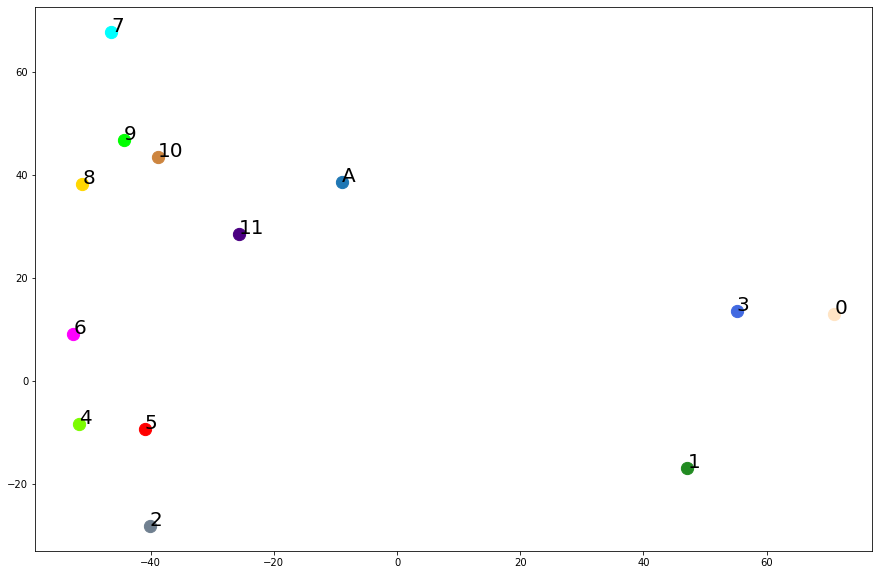

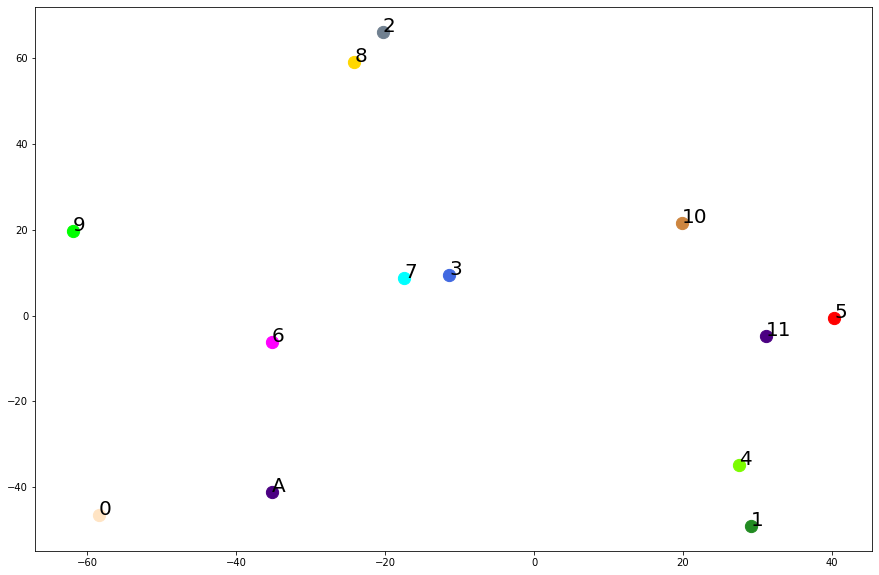

In [41]:
untrained = mymodels.SimpleNet(X_train.shape[1], 30, [X_train.shape[1], 1500, 30])
plot_sim_count(
    X_mat,
    Y_mat,
    model,
    untrained,
    inter_threshold=5,
    intra_threshold=0,
    max_points_per_sim=1,
    weighted_radius=False
)

# PROTOTYPE CODE - NO NEED TO RUN ANYTHING BELOW THIS TEXT

In [46]:
maxlen = 0
maxi = 0
Y_train_maskable = np.ma.array(Y_mat, mask=False)
for i in tqdm(range(Y_mat.shape[0])):
    Y_train_maskable.mask[i] = True
    sim_uniq, sim_counts = np.unique(np.sum(Y_train_maskable == Y_mat[i], axis=1), return_counts=True)
    sim_uniq = sim_uniq.compressed()
    if maxlen < sim_uniq.shape[0] and np.all(sim_counts[:-1] > 10):
        maxlen = sim_uniq.shape[0]
        maxi = i
    Y_train_maskable.mask[i] = False

print(f'Max Similarity Count: {maxlen}')
print(f'Best Anchor Index: {maxi}')

  0%|          | 0/7845 [00:00<?, ?it/s]

Max Similarity Count: 12
Best Anchor Index: 1514


In [47]:
sim_list_indcs = []
for i in range(maxlen):
    sim_list_indcs.append(np.where(np.sum(Y_mat == Y_mat[maxi], axis=1) == i)[0])

In [150]:
Y_mat[1514]

array([ 1.,  1., nan,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [44]:
emb_train = model(torch.from_numpy(X_mat.astype('float32'))).detach().numpy()
tsne_train = TSNE(n_components=2, metric='euclidean').fit_transform(emb_train)

/media/indirected/Local Disk/University/Work/Sport Analysis/Prediction_ThesisMethod/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/media/indirected/Local Disk/University/Work/Sport Analysis/Prediction_ThesisMethod/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [39]:
for i in range(maxlen): 
    criteria = np.argsort(np.linalg.norm(tsne_train[sim_list_indcs[i]] - tsne_train[maxi], axis=1))
    sim_list_indcs[i] = sim_list_indcs[i][criteria]

In [155]:
radius = [sim.shape[0] for sim in sim_list_indcs]
radius = np.array(radius) / np.sum(radius) * 100000

In [156]:
np.linalg.norm(tsne_train[sim_list_indcs[11]] - tsne_train[maxi], axis=1)

array([  0.      ,   9.345054,  12.090567,  14.148814,  15.036605,
        87.47319 ,  87.792595,  94.57502 , 133.02864 , 133.48141 ,
       134.92148 , 134.99574 , 135.24104 , 136.1873  , 138.46605 ,
       138.47943 ], dtype=float32)

In [187]:
model(torch.tensor(X_mat[[maxi]].astype('float32')))

tensor([[0.2344, 0.2003, 0.2266, 0.0955, 0.1925, 0.2575, 0.3010, 0.2358, 0.0000,
         0.2829, 0.0000, 0.0000, 0.1640, 0.0000, 0.2036, 0.2559, 0.0000, 0.2650,
         0.0000, 0.2030, 0.2660, 0.0000, 0.0000, 0.0000, 0.0000, 0.2301, 0.2551,
         0.0000, 0.2843, 0.0000]], grad_fn=<DivBackward0>)

In [185]:
mmmm = copy.deepcopy(model)
for layer in mmmm.children():
   if hasattr(layer, 'reset_parameters'):
       layer.reset_parameters()

In [186]:
mmmm(torch.tensor(X_mat[[maxi]].astype('float32')))

tensor([[0.2344, 0.2003, 0.2266, 0.0955, 0.1925, 0.2575, 0.3010, 0.2358, 0.0000,
         0.2829, 0.0000, 0.0000, 0.1640, 0.0000, 0.2036, 0.2559, 0.0000, 0.2650,
         0.0000, 0.2030, 0.2660, 0.0000, 0.0000, 0.0000, 0.0000, 0.2301, 0.2551,
         0.0000, 0.2843, 0.0000]], grad_fn=<DivBackward0>)

In [157]:
tsne_train.shape

(7845, 2)

In [160]:
tsne_train[maxi]

array([-25.64416 ,  59.616642], dtype=float32)

In [161]:
tsne_train[sim_list_indcs[11][1]]

array([-24.919777,  50.299706], dtype=float32)

In [170]:
np.all(X_mat[maxi] == X.iloc[maxi, 1:].to_numpy())

True

In [163]:
X_mat[maxi]

array([0, 0, 1, ..., 0, 0, 0])

In [172]:
X.iloc[maxi, 0]

'ERR1873439'

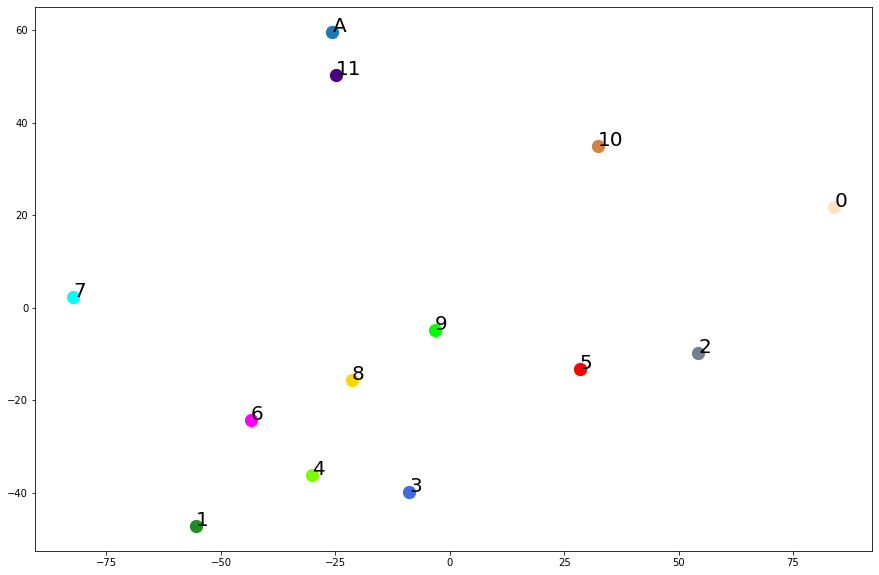

In [173]:
fig, ax = plt.subplots()
threshold = 5
prev_norm = np.linalg.norm(tsne_train[sim_list_indcs[-1][1]] - tsne_train[maxi]) - threshold
prev_norm = 0.01
threshold2 = 0
max_points = 1
colors = ['bisque', 'forestgreen', 'slategrey', 'royalblue', 'lawngreen', 'red', 'magenta', 'cyan', 'gold', 'lime', 'peru', 'indigo']
ax.scatter(tsne_train[maxi, 0], tsne_train[maxi, 1], s=150)
ax.annotate('A', (tsne_train[maxi, 0], tsne_train[maxi, 1]), fontsize= 20)
selected_points_dict = {'A': X.iloc[maxi, 0]}
for i in reversed(range(maxlen)):
    for j in range(sim_list_indcs[i].shape[0]):
        current_norm = np.linalg.norm(tsne_train[sim_list_indcs[i][j]] - tsne_train[maxi])
        if current_norm >= prev_norm + threshold:
            prev_norm = current_norm
            current_centroid = tsne_train[sim_list_indcs[i][j]]
            selected_points_dict[i] = X.iloc[sim_list_indcs[i][j], 0]
            point_count = 0
            while threshold2 >= np.linalg.norm(tsne_train[sim_list_indcs[i][j]] - current_centroid) and point_count < max_points:
                ax.scatter(tsne_train[sim_list_indcs[i][j], 0], tsne_train[sim_list_indcs[i][j], 1], s=150, c=colors[i])
                ax.annotate(str(i), (tsne_train[sim_list_indcs[i][j], 0], tsne_train[sim_list_indcs[i][j], 1]), fontsize=20)
                point_count += 1
                j += 1
                if j == sim_list_indcs[i].shape[0]:
                    break
            break

fig.set_facecolor('w')
fig.set_size_inches((15,10))
fig.savefig('tsne.png', dpi=300)

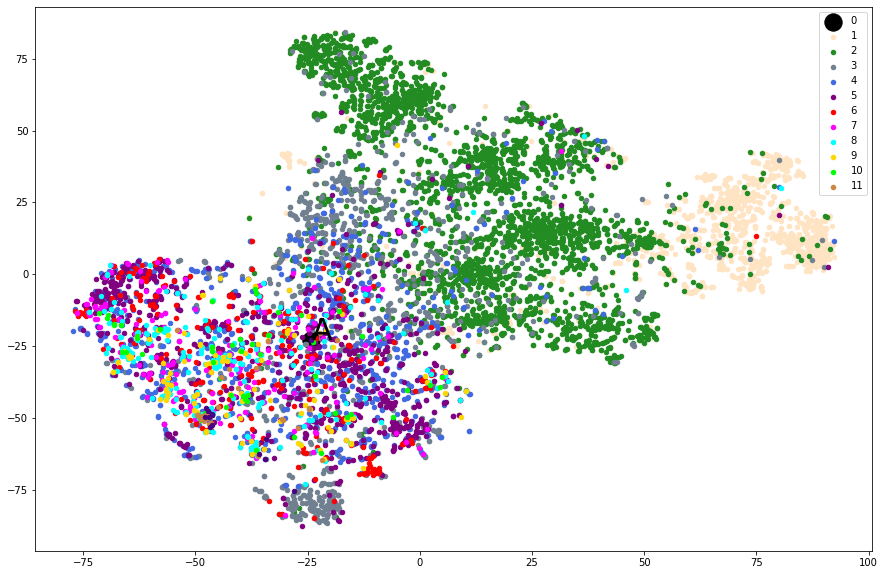

In [54]:
fig, ax = plt.subplots()

ax.scatter(tsne_train[maxi, 0], tsne_train[maxi, 1], s=300, c='black')
ax.annotate('A', (tsne_train[maxi, 0], tsne_train[maxi, 1]), fontsize= 30)
colors = ['bisque', 'forestgreen', 'slategrey', 'royalblue', 'purple', 'red', 'magenta', 'cyan', 'gold', 'lime', 'peru', 'indigo']
for i in range(maxlen):        
    ax.scatter(tsne_train[sim_list_indcs[i][:], 0], tsne_train[sim_list_indcs[i][:], 1], s=20, c=colors[i])
    #ax.annotate(str(i), (tsne_train[sim_list_indcs[i][0], 0], tsne_train[sim_list_indcs[i][0], 1]), fontsize=20)
ax.legend([str(i) for i in range(maxlen)])
fig.set_size_inches((15,10))